<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Acquisition-&amp;-Cleaning" data-toc-modified-id="Data-Acquisition-&amp;-Cleaning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Acquisition &amp; Cleaning</a></span></li><li><span><a href="#Early-Viz/EDA" data-toc-modified-id="Early-Viz/EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Early Viz/EDA</a></span></li><li><span><a href="#OneHot-Encoding" data-toc-modified-id="OneHot-Encoding-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>OneHot Encoding</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>XGBoost</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusions</a></span></li></ul></div>

In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplot
%matplotlib inline

# Data Acquisition & Cleaning

In [167]:
path = r'Q:\ExcelDataAnalysis-BusinessModeling\food_inspection_xls.xlsx'
df = pd.read_excel(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190795 entries, 0 to 190794
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Name                        190795 non-null  object        
 1   Program Identifier          190732 non-null  object        
 2   Inspection Date             190490 non-null  datetime64[ns]
 3   Description                 190795 non-null  object        
 4   Address                     190766 non-null  object        
 5   City                        190795 non-null  object        
 6   Zip Code                    190795 non-null  int64         
 7   Phone                       123246 non-null  object        
 8   Longitude                   190537 non-null  float64       
 9   Latitude                    190537 non-null  float64       
 10  Inspection Business Name    190490 non-null  object        
 11  Inspection Type             190490 non-

In [168]:
# Look at the unique city names
df['City'].unique()

array(['SEATTLE', 'Seattle', 'Renton', 'BELLEVUE', 'KENT', 'KENMORE',
       'Bellevue', 'Issaquah', 'Bothell', 'WOODINVILLE', 'Kent', 'RENTON',
       'FEDERAL WAY', 'Kirkland', 'Auburn', 'BURIEN', 'Federal Way',
       'DES MOINES', 'SHORELINE', 'Redmond', 'Woodinville',
       'Maple Valley', 'BLACK DIAMOND', 'REDMOND', 'BOTHELL', 'COVINGTON',
       'AUBURN', 'KIRKLAND', 'SNOQUALMIE', 'ENUMCLAW', 'TUKWILA',
       'LAKE FOREST PARK', 'SAMMAMISH', 'ISSAQUAH', 'MAPLE VALLEY',
       'NORMANDY PARK', 'MERCER ISLAND', 'NORTH BEND', 'SEA TAC',
       'VASHON ISLAND', 'SEATAC', 'Mercer Island', 'Pacific', 'NEWCASTLE',
       'North Bend', 'Duvall', 'SEAHURST', 'Enumclaw', 'CLYDE HILL',
       'DUVALL', 'SNOQUALMIE PASS', 'PACIFIC', 'Black Diamond',
       'Snoqualmie', 'Carnation', 'PRESTON', 'KING COUNTY', 'Vashon',
       'CARNATION', 'Skykomish', 'Fall City', 'ALGONA', 'SEATTLE, SOUTH',
       'Baring', 'FALL CITY', 'LYNNWOOD', 'MOUNTLAKE TERRACE', 'HOBART',
       'EVERETT', 'RAVENSD

In [169]:
df['City'] = df['City'].astype(str)

In [170]:
# Remove symbols in phone number
df['Phone'] = df['Phone'].str.replace(pat="\(|\)|-|=", repl="", regex=True)

In [171]:
# Remove letters in phone number
df['Phone'] = df['Phone'].str.replace(pat="EXT", repl="", regex=True)

In [172]:
# Remove letters in phone number
df['Phone'] = df['Phone'].str.replace(pat="X", repl="", regex=True)

In [173]:
df['Phone'] = df['Phone'].str.replace(' ', '')

In [174]:
df['Phone'].unique()

array(['2069471460', nan, '2062714968', ..., '3606980417', '2065750500',
       '2067818600'], dtype=object)

In [175]:
#

In [176]:
# Remove NaNs
df = df[df['Phone'].notna()]
df = df[df['Phone'] != 'nan']

In [177]:
# Remove NaNs
df = df[df['Inspection Score'].notna()]
df = df[df['Inspection Score'] != 'nan']

In [178]:
#

In [179]:
df['Phone'].apply(lambda x: ' '.join(x[:10].split(' ')[:-1]) if len(x) > 10 else x)

0         2069471460
1         2069471460
2         2069471460
3         2069471460
4         2069471460
             ...    
190790    2067818600
190791    2067818600
190792    2067818600
190793    2067818600
190794    2067818600
Name: Phone, Length: 122934, dtype: object

In [180]:
# Convert inspection score to int
df['Inspection Score'] = df['Inspection Score'].astype(int)

In [181]:
# look at column values again
df['Phone'].unique()

array(['2069471460', '2062714968', '4253731068', ..., '3606980417',
       '2065750500', '2067818600'], dtype=object)

In [182]:
df['Inspection Score'].unique()

array([ 25,   0,   5,  20,  30,   8,  13,  10,  38,  28,   3,  12,  55,
        40,  23,  35,  18,  15,  50,   2,  26,  45,  47,  37,  41,  51,
        33,   7,  32,  22,   4,  58,  17,  65,  60,  27,  21,   6,  43,
        36,  88,  70, 100,  48,  63,  24,  19,  16, 103,  31,  75,  11,
        52,  53,  68,  57,  64,  34,  42,  46,  44,  82,  80, 110,  90,
        67,  14,  39,  29,  56,  85,  61,  59,  72,  73,  74, 152,  71,
        62,  87,  66,  98,   9,  86,  93,  96,  95,  54,  78, 122,  83,
       168,  81, 126,  49, 118,  91, 105, 138,  99, 104, 108, 101, 136,
        92,  76,  69, 135,  77, 129, 151,  94, 690, 195, 149, 120, 128,
       166, 125, -30, 111, 102, 109, 132])

In [183]:
df = df[df['Inspection Score'] > 0]

In [184]:
df['Inspection Score'].unique()

array([ 25,   5,  20,  30,   8,  13,  10,  38,  28,   3,  12,  55,  40,
        23,  35,  18,  15,  50,   2,  26,  45,  47,  37,  41,  51,  33,
         7,  32,  22,   4,  58,  17,  65,  60,  27,  21,   6,  43,  36,
        88,  70, 100,  48,  63,  24,  19,  16, 103,  31,  75,  11,  52,
        53,  68,  57,  64,  34,  42,  46,  44,  82,  80, 110,  90,  67,
        14,  39,  29,  56,  85,  61,  59,  72,  73,  74, 152,  71,  62,
        87,  66,  98,   9,  86,  93,  96,  95,  54,  78, 122,  83, 168,
        81, 126,  49, 118,  91, 105, 138,  99, 104, 108, 101, 136,  92,
        76,  69, 135,  77, 129, 151,  94, 690, 195, 149, 120, 128, 166,
       125, 111, 102, 109, 132])

In [185]:
print(len(df))

74469


In [186]:
df.head()

,Name,Program Identifier,Inspection Date,Description,Address,City,Zip Code,Phone,Longitude,Latitude,...,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,Violation Description,Violation Points,Business_ID,Inspection_Serial_Num,Violation_Record_ID,Location
0,@ The PEAK,@ The PEAK,2013-01-25,Seating 13-50 - Risk Category III,401 BROADWAY,SEATTLE,98122,2069471460,-122.321198,47.605624,...,25,Unsatisfactory,0.0,blue,"Warewashing facilities not properly installed,...",5,PR0071429,DA2409066,IV6475299,NaN
1,@ The PEAK,@ The PEAK,2013-01-25,Seating 13-50 - Risk Category III,401 BROADWAY,SEATTLE,98122,2069471460,-122.321198,47.605624,...,25,Unsatisfactory,0.0,blue,"Wiping cloths improperly used, stored",5,PR0071429,DA2409066,IV6475303,NaN
2,@ The PEAK,@ The PEAK,2013-01-25,Seating 13-50 - Risk Category III,401 BROADWAY,SEATTLE,98122,2069471460,-122.321198,47.605624,...,25,Unsatisfactory,0.0,red,"Food worker card not available or current, new...",5,PR0071429,DA2409066,IV6475296,NaN
3,@ The PEAK,@ The PEAK,2013-01-25,Seating 13-50 - Risk Category III,401 BROADWAY,SEATTLE,98122,2069471460,-122.321198,47.605624,...,25,Unsatisfactory,0.0,red,Inadequate hand washing facilities,10,PR0071429,DA2409066,IV6475278,NaN
5,@ The PEAK,@ The PEAK,2012-05-02,Seating 13-50 - Risk Category III,401 BROADWAY,SEATTLE,98122,2069471460,-122.321198,47.605624,...,5,Satisfactory,0.0,blue,"Warewashing facilities not properly installed,...",5,PR0071429,DA2330069,IV5290066,NaN


In [187]:
# Drop 'Location'
df = df.drop(columns='Location')

In [188]:
# We're going to fix the City names by lowercasing the entire string and then capitalizing first letter only
df['City'] = df['City'].str.lower()

In [189]:
# uppercase first letter only 
df['City'] = df['City'].str.capitalize()

In [190]:
df.head()

,Name,Program Identifier,Inspection Date,Description,Address,City,Zip Code,Phone,Longitude,Latitude,...,Inspection Type,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,Violation Description,Violation Points,Business_ID,Inspection_Serial_Num,Violation_Record_ID
0,@ The PEAK,@ The PEAK,2013-01-25,Seating 13-50 - Risk Category III,401 BROADWAY,Seattle,98122,2069471460,-122.321198,47.605624,...,Routine Inspection/Field Review,25,Unsatisfactory,0.0,blue,"Warewashing facilities not properly installed,...",5,PR0071429,DA2409066,IV6475299
1,@ The PEAK,@ The PEAK,2013-01-25,Seating 13-50 - Risk Category III,401 BROADWAY,Seattle,98122,2069471460,-122.321198,47.605624,...,Routine Inspection/Field Review,25,Unsatisfactory,0.0,blue,"Wiping cloths improperly used, stored",5,PR0071429,DA2409066,IV6475303
2,@ The PEAK,@ The PEAK,2013-01-25,Seating 13-50 - Risk Category III,401 BROADWAY,Seattle,98122,2069471460,-122.321198,47.605624,...,Routine Inspection/Field Review,25,Unsatisfactory,0.0,red,"Food worker card not available or current, new...",5,PR0071429,DA2409066,IV6475296
3,@ The PEAK,@ The PEAK,2013-01-25,Seating 13-50 - Risk Category III,401 BROADWAY,Seattle,98122,2069471460,-122.321198,47.605624,...,Routine Inspection/Field Review,25,Unsatisfactory,0.0,red,Inadequate hand washing facilities,10,PR0071429,DA2409066,IV6475278
5,@ The PEAK,@ The PEAK,2012-05-02,Seating 13-50 - Risk Category III,401 BROADWAY,Seattle,98122,2069471460,-122.321198,47.605624,...,Routine Inspection/Field Review,5,Satisfactory,0.0,blue,"Warewashing facilities not properly installed,...",5,PR0071429,DA2330069,IV5290066


What kind of information do we want here? For one, we could map our venues using the longitude and latitude parameters. Second, we could first determine what the threshold inspection score is for satisfactory and look at which venues passed. I can create two dataframes then. 

In [191]:
df_inspection = df[['Name','Inspection Date', 'Address', 'City', 'Inspection Type', 'Inspection Score', 'Inspection Result', 'Inspection Closed Business', 'Violation Type', 'Violation Points', 'Inspection_Serial_Num',]]

In [192]:
df_inspection.head()

,Name,Inspection Date,Address,City,Inspection Type,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,Violation Points,Inspection_Serial_Num
0,@ The PEAK,2013-01-25,401 BROADWAY,Seattle,Routine Inspection/Field Review,25,Unsatisfactory,0.0,blue,5,DA2409066
1,@ The PEAK,2013-01-25,401 BROADWAY,Seattle,Routine Inspection/Field Review,25,Unsatisfactory,0.0,blue,5,DA2409066
2,@ The PEAK,2013-01-25,401 BROADWAY,Seattle,Routine Inspection/Field Review,25,Unsatisfactory,0.0,red,5,DA2409066
3,@ The PEAK,2013-01-25,401 BROADWAY,Seattle,Routine Inspection/Field Review,25,Unsatisfactory,0.0,red,10,DA2409066
5,@ The PEAK,2012-05-02,401 BROADWAY,Seattle,Routine Inspection/Field Review,5,Satisfactory,0.0,blue,5,DA2330069


# Early Viz/EDA

In [193]:
subset0 = df_inspection[['Inspection Score', 'Inspection Result']]
subset0.head()

,Inspection Score,Inspection Result
0,25,Unsatisfactory
1,25,Unsatisfactory
2,25,Unsatisfactory
3,25,Unsatisfactory
5,5,Satisfactory


In [194]:
subset0['Inspection Result'].unique()

array(['Unsatisfactory', 'Satisfactory', 'Complete', 'Baseline Data',
       'Incomplete', 'Not Applicable', 'No Longer At Location',
       'Confirmed', 'Not Confirmed', 'Positive', 'Not Permitted',
       'Not Accessible'], dtype=object)

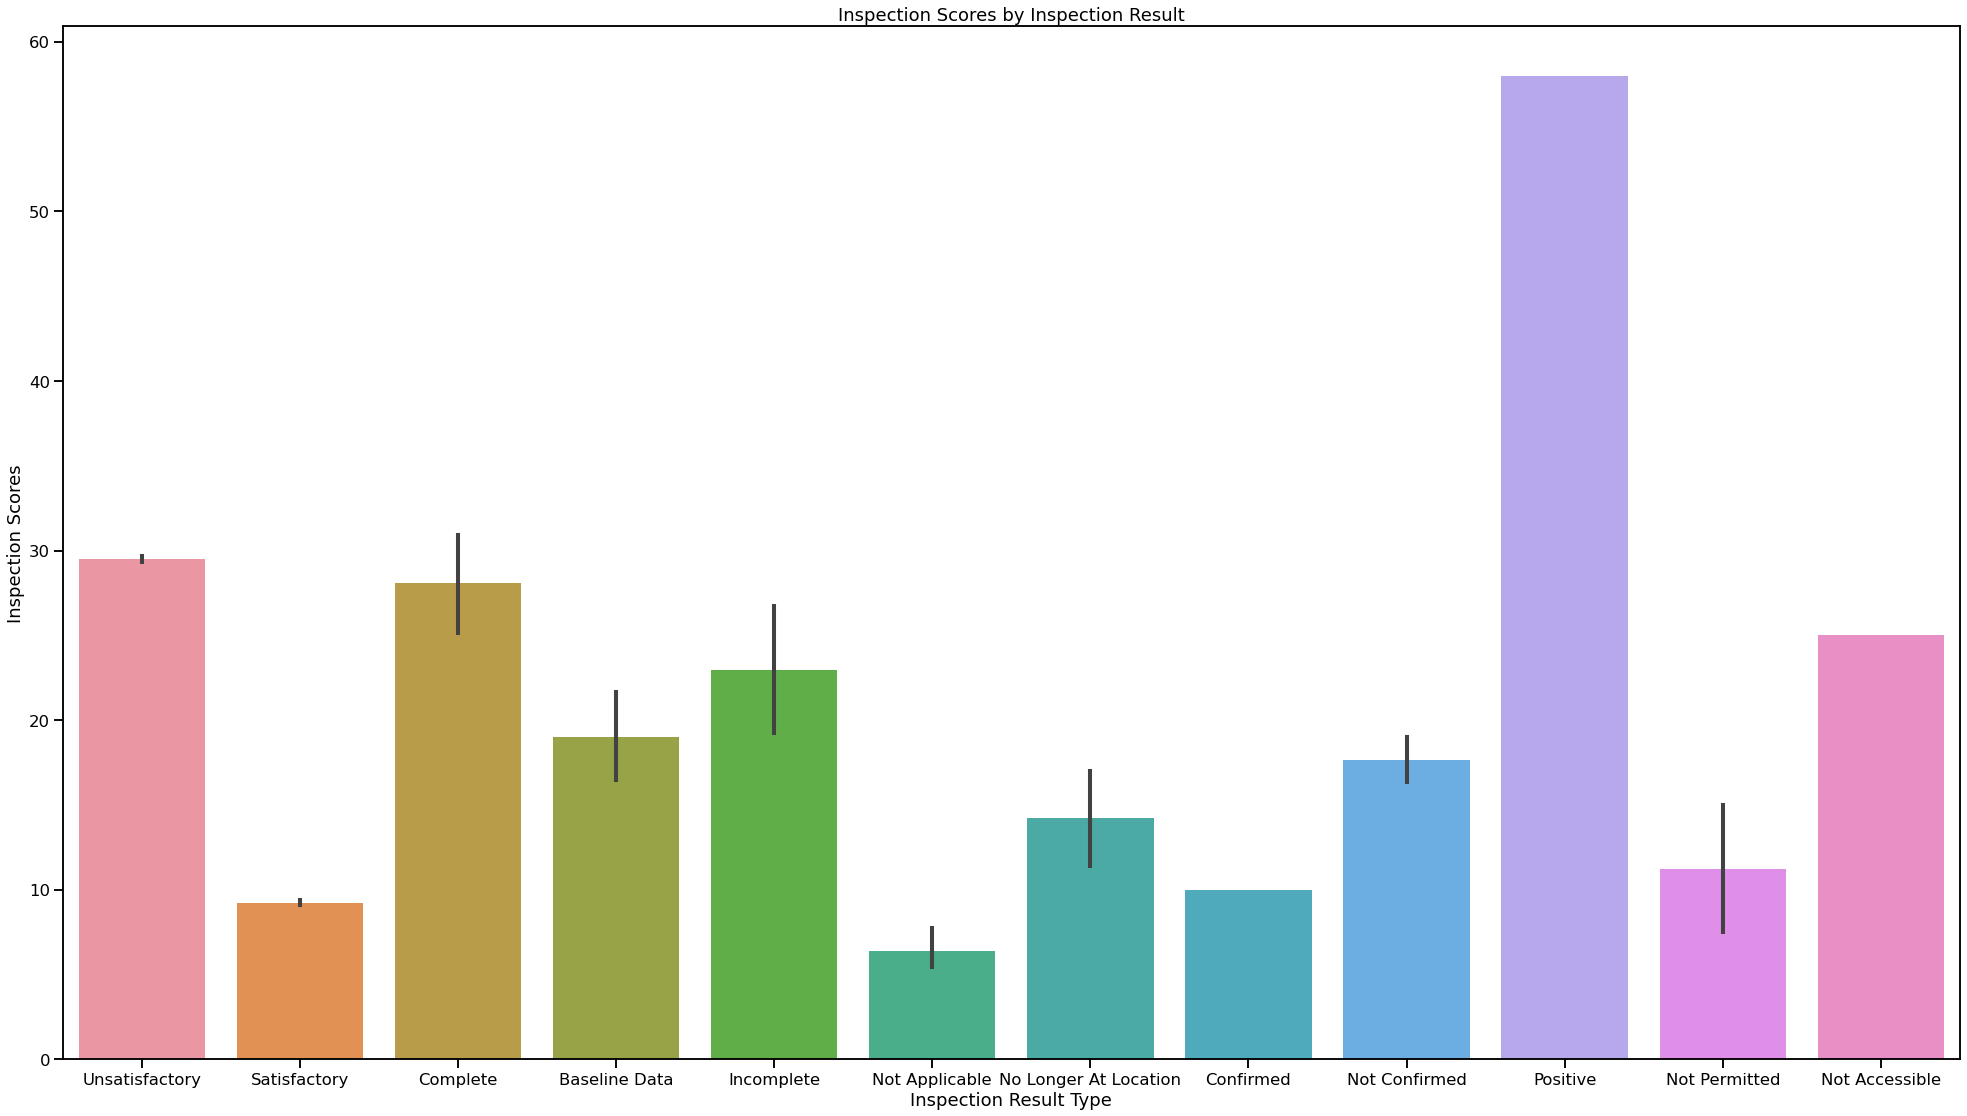

In [195]:
import matplotlib.pyplot as plt

# barplot total Inspection Score per Inspection Result
plt.figure(figsize=(34,19))
sns.barplot(x= 'Inspection Result', y='Inspection Score', data=subset0)
plt.xlabel('Inspection Result Type')
plt.title('Inspection Scores by Inspection Result')
plt.ylabel('Inspection Scores')
plt.show()

I'm going to OneHot Encode this, but first I want to do more EDA using heatmap for correlations and getting some preliminary stats. I'm going to try to do a linear regression as well. 

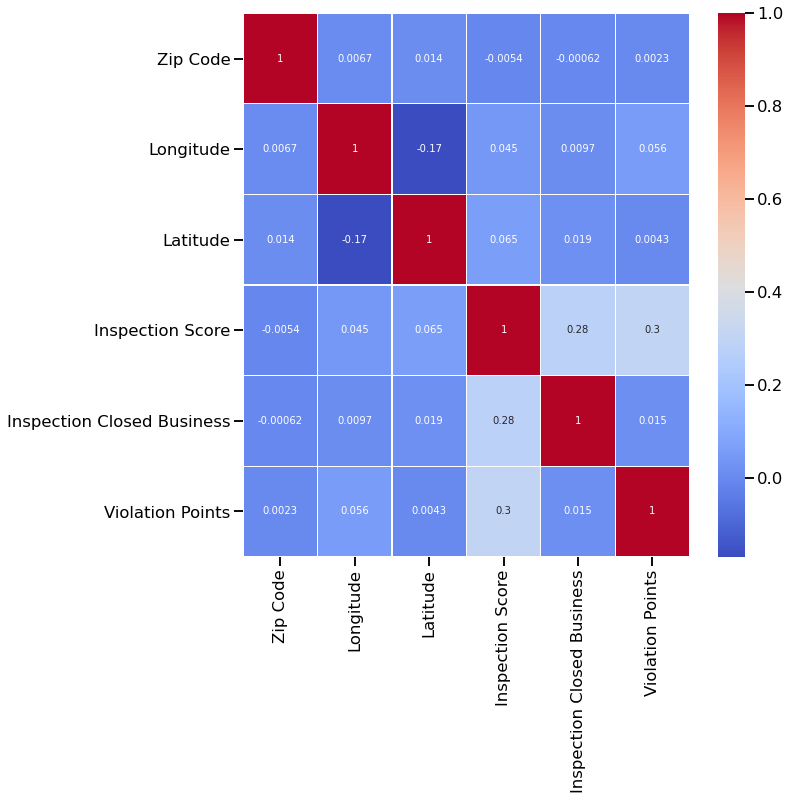

In [196]:
# Going to look at correlations between parameters in 'df'
import matplotlib.pyplot as plt
# Heatmap
_= plt.figure(figsize=(10,10))
heatmap = sns.heatmap(df.corr(), annot=True, linewidth=0.4, cmap="coolwarm")
plt.show()

In [197]:
subset1 = df_inspection[['Inspection Score', 'Violation Points', 'Inspection Closed Business']]
subset1.head()

,Inspection Score,Violation Points,Inspection Closed Business
0,25,5,0.0
1,25,5,0.0
2,25,5,0.0
3,25,10,0.0
5,5,5,0.0


In [198]:
subset1['Violation Points'].unique()

array([ 5, 10,  3, 25,  2, 30, 15,  0], dtype=int64)

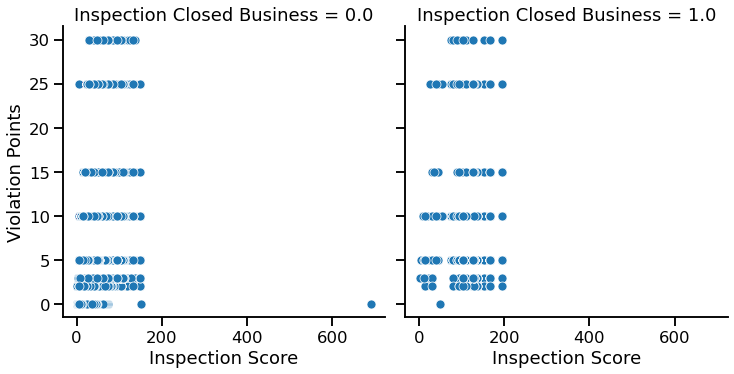

In [199]:
sns.relplot(x="Inspection Score", y="Violation Points", data=subset1, kind="scatter", col='Inspection Closed Business')

In [200]:
#

Text(0, 0.5, 'Count')

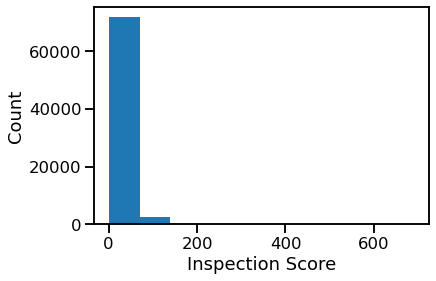

In [201]:
# Histogram of Inspection Score and Violation Points
plt.hist(subset1['Inspection Score'])
plt.xlabel('Inspection Score')
plt.ylabel('Count')

In [202]:
def brief_summary(df):
    print(df.std())
    print(df.describe())
    print(df.hist())

Inspection Score              20.206190
Violation Points               6.245517
Inspection Closed Business     0.068298
dtype: float64
       Inspection Score  Violation Points  Inspection Closed Business
count      74469.000000      74469.000000                74469.000000
mean          25.452336          7.569969                    0.004687
std           20.206190          6.245517                    0.068298
min            2.000000          0.000000                    0.000000
25%           10.000000          5.000000                    0.000000
50%           20.000000          5.000000                    0.000000
75%           35.000000         10.000000                    0.000000
max          690.000000         30.000000                    1.000000
[[<AxesSubplot:title={'center':'Inspection Score'}>
  <AxesSubplot:title={'center':'Violation Points'}>]
 [<AxesSubplot:title={'center':'Inspection Closed Business'}>
  <AxesSubplot:>]]


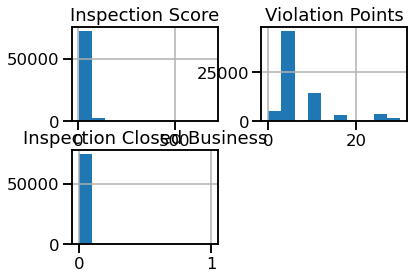

In [203]:
brief_summary(subset1)

In [204]:
# OLS
# Create test and train sets.
x = subset1[['Inspection Score']]
# Ensure to add a constant, for Ordinary Least Squares
x2 = sm.add_constant(x)

In [205]:
x2

,const,Inspection Score
0,1.0,25
1,1.0,25
2,1.0,25
3,1.0,25
5,1.0,5
...,...,...
190786,1.0,20
190787,1.0,5
190788,1.0,15
190789,1.0,15


In [206]:
y = subset1[['Violation Points']]

In [207]:
y

,Violation Points
0,5
1,5
2,5
3,10
5,5
...,...
190786,5
190787,0
190788,5
190789,10


In [208]:
# Split the data using train_test_split()
x2train, x2test, ytrain, ytest = train_test_split(x2, y, test_size=0.30, shuffle=True)
print(x2train.shape, ytrain.shape)

(52128, 2) (52128, 1)


In [209]:
# Create the model
rmodel = sm.OLS(ytrain, x2train)
# Fit the model with fit() 
fit_model = rmodel.fit()

In [210]:
# Evaluate the model with .summary()
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Violation Points   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     5375.
Date:                Fri, 13 May 2022   Prob (F-statistic):               0.00
Time:                        20:01:52   Log-Likelihood:            -1.6698e+05
No. Observations:               52128   AIC:                         3.340e+05
Df Residuals:                   52126   BIC:                         3.340e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.1713      0.042    123.345      0.000       5.089       5.253
Inspection Score     0.0947      0.001     73.313      0.000       0.092       0.097
==============================================================================
Omnibus:                    17696.468   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58430.385
Skew:                           1.745   Prob(JB):                         0.00
Kurtosis:                       6.836   Cond. No.                         52.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [211]:
# Let's attempt to make predictions of y
y_predict = fit_model.predict(x2test)

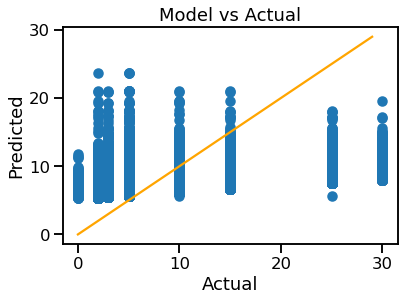

In [212]:
# Plot predictions
plt.scatter(ytest, y_predict)
plt.title("Model vs Actual")
plt.xlabel("Actual")
plt.ylabel("Predicted")

# Line of perfect correlation
plt.plot([x for x in range(0,30)], [x for x in range(0,30)], color = "orange")
plt.show()

# OneHot Encoding

In [338]:
cols_to_delete = ['Name','Phone','Longitude', 'Latitude', 'Program Identifier','Description','Address','City','Zip Code', 'Inspection Business Name','Inspection Date', 'Business_ID','Inspection_Serial_Num', 'Violation Description','Violation_Record_ID']
pred_model = df.drop(cols_to_delete, axis=1)

In [339]:
# Categorical features
cat = pred_model.dtypes == np.object
# Turn into list
cat_cols = pred_model.columns[cat].tolist()
print(cat_cols)

['Inspection Type', 'Inspection Result', 'Violation Type']


In [340]:
# Let's use Inspection Closed Business as a boolean, but we still have to figure out what 0 and 1 actually equals to.
# Does 0= closed and 1= open?
pred_model['Inspection Closed Business'] = pred_model['Inspection Closed Business'].astype(int)

In [341]:
pred_model.head()

,Inspection Type,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,Violation Points
0,Routine Inspection/Field Review,25,Unsatisfactory,0,blue,5
1,Routine Inspection/Field Review,25,Unsatisfactory,0,blue,5
2,Routine Inspection/Field Review,25,Unsatisfactory,0,red,5
3,Routine Inspection/Field Review,25,Unsatisfactory,0,red,10
5,Routine Inspection/Field Review,5,Satisfactory,0,blue,5


I want to take a closer look at the 'Inspection Closed Business' column. Ideally, I want to use it as a boolean to separate closed and open business (status). 

In [342]:
ones = df[df['Inspection Closed Business'] == 1.0]
ones

,Name,Program Identifier,Inspection Date,Description,Address,City,Zip Code,Phone,Longitude,Latitude,...,Inspection Type,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,Violation Description,Violation Points,Business_ID,Inspection_Serial_Num,Violation_Record_ID
3108,9 MILLION,9 MILLION IN UNMARKED BILLS,2012-07-30,Seating 51-150 - Risk Category III,3507 FREMONT PL N,Seattle,98103,2065792249,-122.351090,47.650924,...,Return Inspection,50,Unsatisfactory,1.0,NaN,NaN,0,PR0010620,DA2356626,NaN
17436,BEBAS & AMIGOS,BEBAS & AMIGOS,2011-01-21,Seating 51-150 - Risk Category III,700 5TH AV,Seattle,98104,2066227085,-122.329881,47.605007,...,Routine Inspection/Field Review,152,Unsatisfactory,1.0,blue,Permit not posted; mobile vehicle name not eas...,2,PR0026380,DA2187288,IV2927398
17437,BEBAS & AMIGOS,BEBAS & AMIGOS,2011-01-21,Seating 51-150 - Risk Category III,700 5TH AV,Seattle,98104,2066227085,-122.329881,47.605007,...,Routine Inspection/Field Review,152,Unsatisfactory,1.0,blue,"Food contact surfaces not maintained, clean, s...",5,PR0026380,DA2187288,IV2927408
17438,BEBAS & AMIGOS,BEBAS & AMIGOS,2011-01-21,Seating 51-150 - Risk Category III,700 5TH AV,Seattle,98104,2066227085,-122.329881,47.605007,...,Routine Inspection/Field Review,152,Unsatisfactory,1.0,blue,"Plumbing not properly sized, installed, and ma...",5,PR0026380,DA2187288,IV2927447
17439,BEBAS & AMIGOS,BEBAS & AMIGOS,2011-01-21,Seating 51-150 - Risk Category III,700 5TH AV,Seattle,98104,2066227085,-122.329881,47.605007,...,Routine Inspection/Field Review,152,Unsatisfactory,1.0,blue,"Non-food contact surfaces not maintained, clea...",3,PR0026380,DA2187288,IV2927440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185723,WHEATLESS IN SEATTLE,WHEATLESS IN SEATTLE,2006-11-21,Seating 0-12 - Risk Category III,10003 GREENWOOD AV N,Seattle,98133,2068520563,-122.355801,47.701614,...,Routine Inspection/Field Review,104,Unsatisfactory,1.0,red,Proper Consumer Advisory not posted for raw or...,5,PR0072263,DA1614377,IV0568840
185724,WHEATLESS IN SEATTLE,WHEATLESS IN SEATTLE,2006-11-21,Seating 0-12 - Risk Category III,10003 GREENWOOD AV N,Seattle,98133,2068520563,-122.355801,47.701614,...,Routine Inspection/Field Review,104,Unsatisfactory,1.0,red,Thermometers not available or used as required...,5,PR0072263,DA1614377,IV0568839
185725,WHEATLESS IN SEATTLE,WHEATLESS IN SEATTLE,2006-11-21,Seating 0-12 - Risk Category III,10003 GREENWOOD AV N,Seattle,98133,2068520563,-122.355801,47.701614,...,Routine Inspection/Field Review,104,Unsatisfactory,1.0,red,"Raw meats, poultry, aquatic foods not stored a...",5,PR0072263,DA1614377,IV0568836
185726,WHEATLESS IN SEATTLE,WHEATLESS IN SEATTLE,2006-11-21,Seating 0-12 - Risk Category III,10003 GREENWOOD AV N,Seattle,98133,2068520563,-122.355801,47.701614,...,Routine Inspection/Field Review,104,Unsatisfactory,1.0,red,"No certified PIC by accredited program, nor co...",5,PR0072263,DA1614377,IV0568833


In [343]:
zeros = df[df['Inspection Closed Business'] == 0.0]
zeros

,Name,Program Identifier,Inspection Date,Description,Address,City,Zip Code,Phone,Longitude,Latitude,...,Inspection Type,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,Violation Description,Violation Points,Business_ID,Inspection_Serial_Num,Violation_Record_ID
0,@ The PEAK,@ The PEAK,2013-01-25,Seating 13-50 - Risk Category III,401 BROADWAY,Seattle,98122,2069471460,-122.321198,47.605624,...,Routine Inspection/Field Review,25,Unsatisfactory,0.0,blue,"Warewashing facilities not properly installed,...",5,PR0071429,DA2409066,IV6475299
1,@ The PEAK,@ The PEAK,2013-01-25,Seating 13-50 - Risk Category III,401 BROADWAY,Seattle,98122,2069471460,-122.321198,47.605624,...,Routine Inspection/Field Review,25,Unsatisfactory,0.0,blue,"Wiping cloths improperly used, stored",5,PR0071429,DA2409066,IV6475303
2,@ The PEAK,@ The PEAK,2013-01-25,Seating 13-50 - Risk Category III,401 BROADWAY,Seattle,98122,2069471460,-122.321198,47.605624,...,Routine Inspection/Field Review,25,Unsatisfactory,0.0,red,"Food worker card not available or current, new...",5,PR0071429,DA2409066,IV6475296
3,@ The PEAK,@ The PEAK,2013-01-25,Seating 13-50 - Risk Category III,401 BROADWAY,Seattle,98122,2069471460,-122.321198,47.605624,...,Routine Inspection/Field Review,25,Unsatisfactory,0.0,red,Inadequate hand washing facilities,10,PR0071429,DA2409066,IV6475278
5,@ The PEAK,@ The PEAK,2012-05-02,Seating 13-50 - Risk Category III,401 BROADWAY,Seattle,98122,2069471460,-122.321198,47.605624,...,Routine Inspection/Field Review,5,Satisfactory,0.0,blue,"Warewashing facilities not properly installed,...",5,PR0071429,DA2330069,IV5290066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190786,ZUMA GROCERY,ZUMA GROCERY,2008-06-06,Seating 0-12 - Risk Category III,129 NW 85TH ST,Seattle,98117,2067818600,-122.359308,47.690395,...,Routine Inspection/Field Review,20,Unsatisfactory,0.0,red,"Food worker card not available or current, new...",5,PR0065378,DA1852503,IV0626370
190787,ZUMA GROCERY,ZUMA GROCERY,2008-02-20,Seating 0-12 - Risk Category III,129 NW 85TH ST,Seattle,98117,2067818600,-122.359308,47.690395,...,Routine Inspection/Field Review,5,Satisfactory,0.0,NaN,NaN,0,PR0065378,DA1807300,NaN
190788,ZUMA GROCERY,ZUMA GROCERY,2007-11-29,Seating 0-12 - Risk Category III,129 NW 85TH ST,Seattle,98117,2067818600,-122.359308,47.690395,...,Routine Inspection/Field Review,15,Unsatisfactory,0.0,blue,"Wiping cloths improperly used, stored",5,PR0065378,DA1774630,IV0602185
190789,ZUMA GROCERY,ZUMA GROCERY,2007-11-29,Seating 0-12 - Risk Category III,129 NW 85TH ST,Seattle,98117,2067818600,-122.359308,47.690395,...,Routine Inspection/Field Review,15,Unsatisfactory,0.0,red,Inadequate hand washing facilities,10,PR0065378,DA1774630,IV0602184


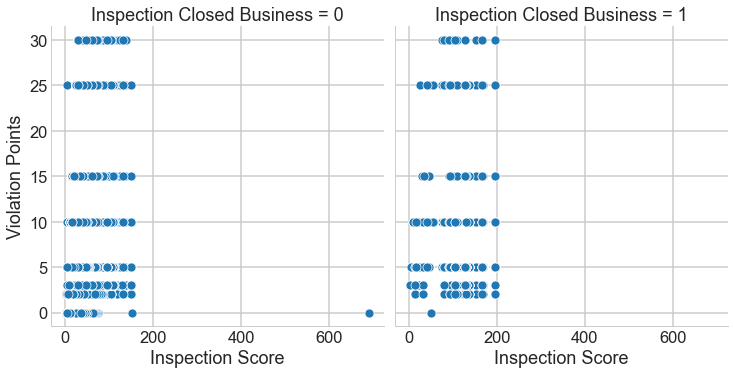

In [344]:
sns.relplot(x="Inspection Score", y="Violation Points", data=pred_model, kind="scatter", col='Inspection Closed Business', col_order=[0, 1])

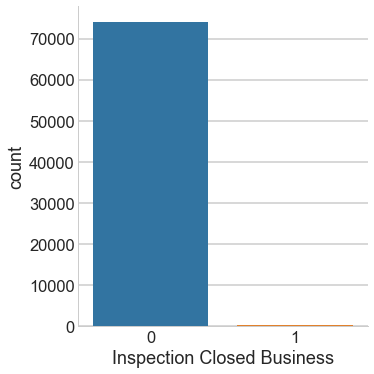

In [345]:
sns.catplot(x="Inspection Closed Business", data=pred_model , kind="count")

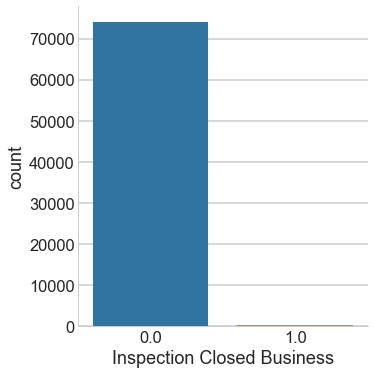

In [346]:
sns.catplot(x="Inspection Closed Business", data=df , kind="count")

There's 349 rows with value 1 for column Inspection Closed Business, but when we do a catplot we get no count for 1. Let's try doing a simple value_counts().

In [347]:
df['Inspection Closed Business'].value_counts()

0.0    74120
1.0      349
Name: Inspection Closed Business, dtype: int64

In [348]:
pred_model['Inspection Closed Business'].value_counts()

0    74120
1      349
Name: Inspection Closed Business, dtype: int64

In [349]:
# Let's continue then
Y = pred_model['Inspection Closed Business']
X = pred_model.drop('Inspection Closed Business', axis=1)

In [350]:
Y

0         0
1         0
2         0
3         0
5         0
         ..
190786    0
190787    0
190788    0
190789    0
190791    0
Name: Inspection Closed Business, Length: 74469, dtype: int32

In [351]:
# Get_dummies for X 
x_getdum = pd.get_dummies(X, columns= cat_cols, prefix_sep='_', drop_first=True)
X0 = x_getdum
X0.head()

,Inspection Score,Violation Points,Inspection Type_Return Inspection,Inspection Type_Routine Inspection/Field Review,Inspection Result_Complete,Inspection Result_Confirmed,Inspection Result_Incomplete,Inspection Result_No Longer At Location,Inspection Result_Not Accessible,Inspection Result_Not Applicable,Inspection Result_Not Confirmed,Inspection Result_Not Permitted,Inspection Result_Positive,Inspection Result_Satisfactory,Inspection Result_Unsatisfactory,Violation Type_red
0,25,5,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,25,5,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,25,5,0,1,0,0,0,0,0,0,0,0,0,0,1,1
3,25,10,0,1,0,0,0,0,0,0,0,0,0,0,1,1
5,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Oh man, 26,064 columns. 

# Random Forest

Ranking of features:
1. feature 0 (0.95)
2. feature 1 (0.04)
3. feature 3 (0.01)
4. feature 2 (0.00)
5. feature 15 (0.00)
6. feature 14 (0.00)
7. feature 13 (0.00)
8. feature 4 (0.00)
9. feature 6 (0.00)
10. feature 10 (0.00)
11. feature 7 (0.00)
12. feature 12 (0.00)
13. feature 9 (0.00)
14. feature 11 (0.00)
15. feature 5 (0.00)
16. feature 8 (0.00)


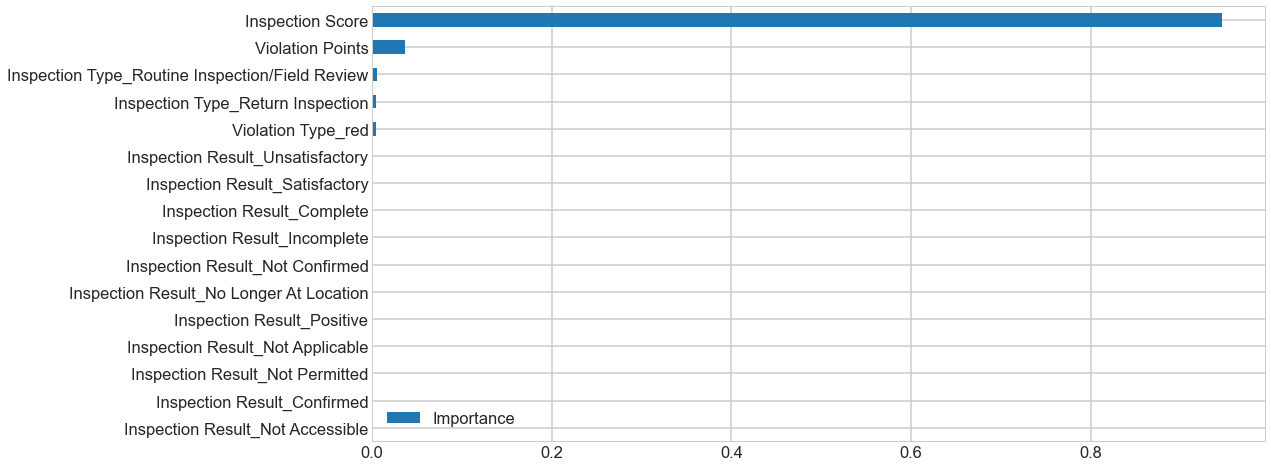

In [352]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10,
                             criterion='gini')
rfc.fit(X0, Y)

# Plot
plt.style.use('seaborn-whitegrid')
feature_importances = rfc.feature_importances_

# Define sigma and indexes
sigma = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indexes = np.argsort(feature_importances)[::-1]

# Print Ranking of features
print("Ranking of features:")
for v in range(X0.shape[1]):
    print("%d. feature %d (%.2f)" % (v + 1, indexes[v], feature_importances[indexes[v]]))
    
# Define plot
df_feature_importance = pd.DataFrame(feature_importances, index=X0.columns, columns=["Importance"])
df_feature_importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize = (16,len(feature_importances)/2));

# XGBoost

In [353]:
# Train and test split
X_train, X_test, y_train, y_test = train_test_split(X0, Y, test_size=0.25, shuffle=True)

XGB_model = XGBClassifier()
XGB_model.fit(X_train, y_train)

[20:24:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [354]:
# y_pred as predictions for test data
y_pred = XGB_model.predict(X_test)
pred = [round(value) for value in y_pred]

# Check predictions
score = accuracy_score(y_test, pred)
print("Accuracy score: %.2f%% " % (score*100))

Accuracy score: 99.73% 


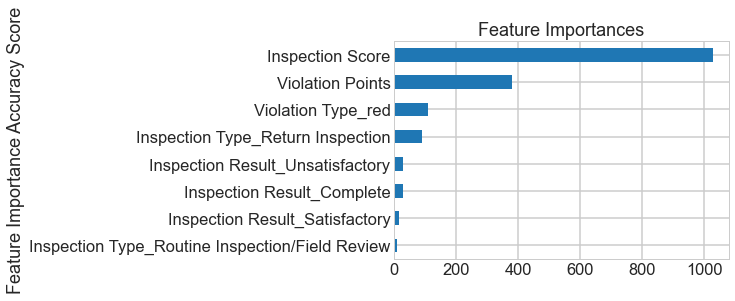

<Figure size 1440x576 with 0 Axes>

In [355]:
# Feature of importances plot
importances = pd.Series(XGB_model.get_booster().get_fscore()).sort_values(ascending=True)
importances.plot(kind='barh', title='Feature Importances')
plt.ylabel('Feature Importance Accuracy Score')
plt.figure(figsize=(20,8))
plt.show()

# Conclusions

For creating a feature of importances, I tried keeping the violation description to see if that was important, however there was no significance found and 'Inspection Score' and 'Violation Points' were at the top. 